##Легенда:
Мы - онлайн магазин спортивных товаров: одежды, обуви, аксессуаров и спорт-питания. На главной странице магазина мы показываем пользователям баннеры с целью стимулирования своих продаж. Сейчас там случайно показывается один из 5 баннеров. Каждый баннер рекламирует конкретный продукт или всю компанию. Наши маркетологи считают, что опыт взаимодействия с баннерами может различаться по сегментам, а их эффективность - зависеть от особенностей пользовательского поведения.

У менеджера компании появилось предложение от партнеров: продать это место для баннера и рекламировать там другой сервис (оплата предполагается по CPC-модели, т.е. стоимость за клик).
###Цель: Помогите менеджеру принять решение - нужно ли продавать это место для рекламы другого сервиса.

Данные для выполнения задания доступны по ссылке: https://yadi.sk/d/12cdc3yym8NksQ
##Описание данных:
У вас есть информация о том, какой баннер показался пользователю, кликнул ли он на него, а так же информация о покупках пользователей.

- title - тип события (показ, клик или покупка)
- user - уникальный идентификатор клиента
- product - продукт баннера/покупки
- page_id - уникальный номер страницы для связки событий (NA для покупок)
- order_id - уникальный номер покупки (NA для кликов и показов баннера)
- time - время совершения действия
- site_version - версия сайта (мобильная или десктопная)

✈️ Важно: на выполнение задания отводится 3 рабочих дня, ответ нужно предоставить ответным письмом по почте в виде файла из Jupyter notebook ✈️



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
from datetime import datetime

from matplotlib import pyplot as plt

import seaborn as sns

from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ha_data.csv', sep=';')

In [4]:
df

,order_id,page_id,product,site_version,time,title,user
0,NaN,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0
1,NaN,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0
2,NaN,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1
3,NaN,10362176.0,company,mobile,2017-04-12 15:39:19,banner_show,user_1
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1
...,...,...,...,...,...,...,...
8471221,NaN,24897184.0,accessories,desktop,2017-05-23 14:07:00,banner_show,user_4254616
8471222,NaN,24897190.0,clothes,mobile,2017-05-28 08:10:20,banner_show,user_4254617
8471223,NaN,24897203.0,sports_nutrition,mobile,2017-05-20 09:20:50,banner_show,user_4254618
8471224,NaN,24897205.0,sneakers,mobile,2017-05-28 19:25:42,banner_show,user_4254619


In [5]:
# Вывод первых 5 строк
print("Первые 5 строк датафрейма:")
df.head()

Первые 5 строк датафрейма:


,order_id,page_id,product,site_version,time,title,user
0,NaN,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0
1,NaN,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0
2,NaN,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1
3,NaN,10362176.0,company,mobile,2017-04-12 15:39:19,banner_show,user_1
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1


In [6]:
# Вывод формы датафрейма (количество строк и столбцов)
print("\nРазмер датафрейма:")
print(f"Строк: {df.shape[0]}, Столбцов: {df.shape[1]}")


Размер датафрейма:
Строк: 8471226, Столбцов: 7



Визуализация пропущенных данных:


<Axes: >

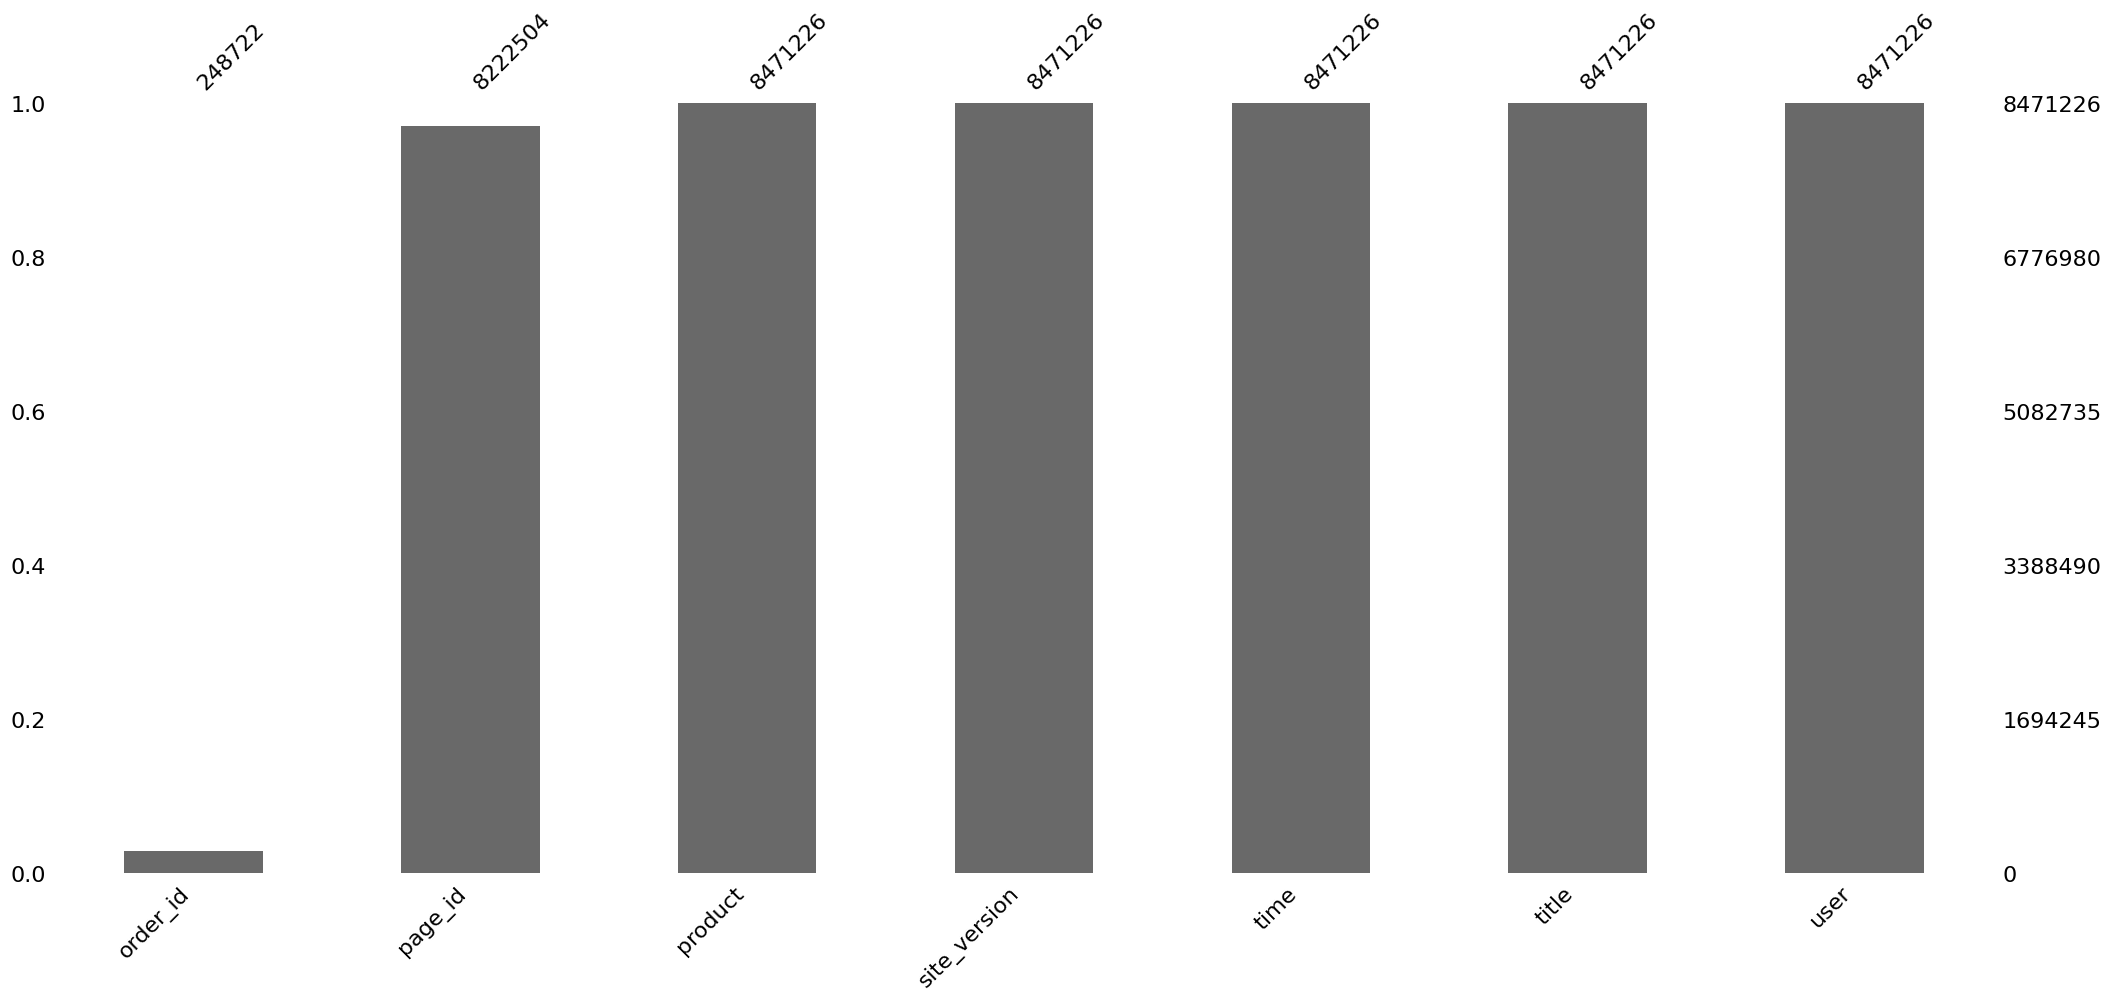

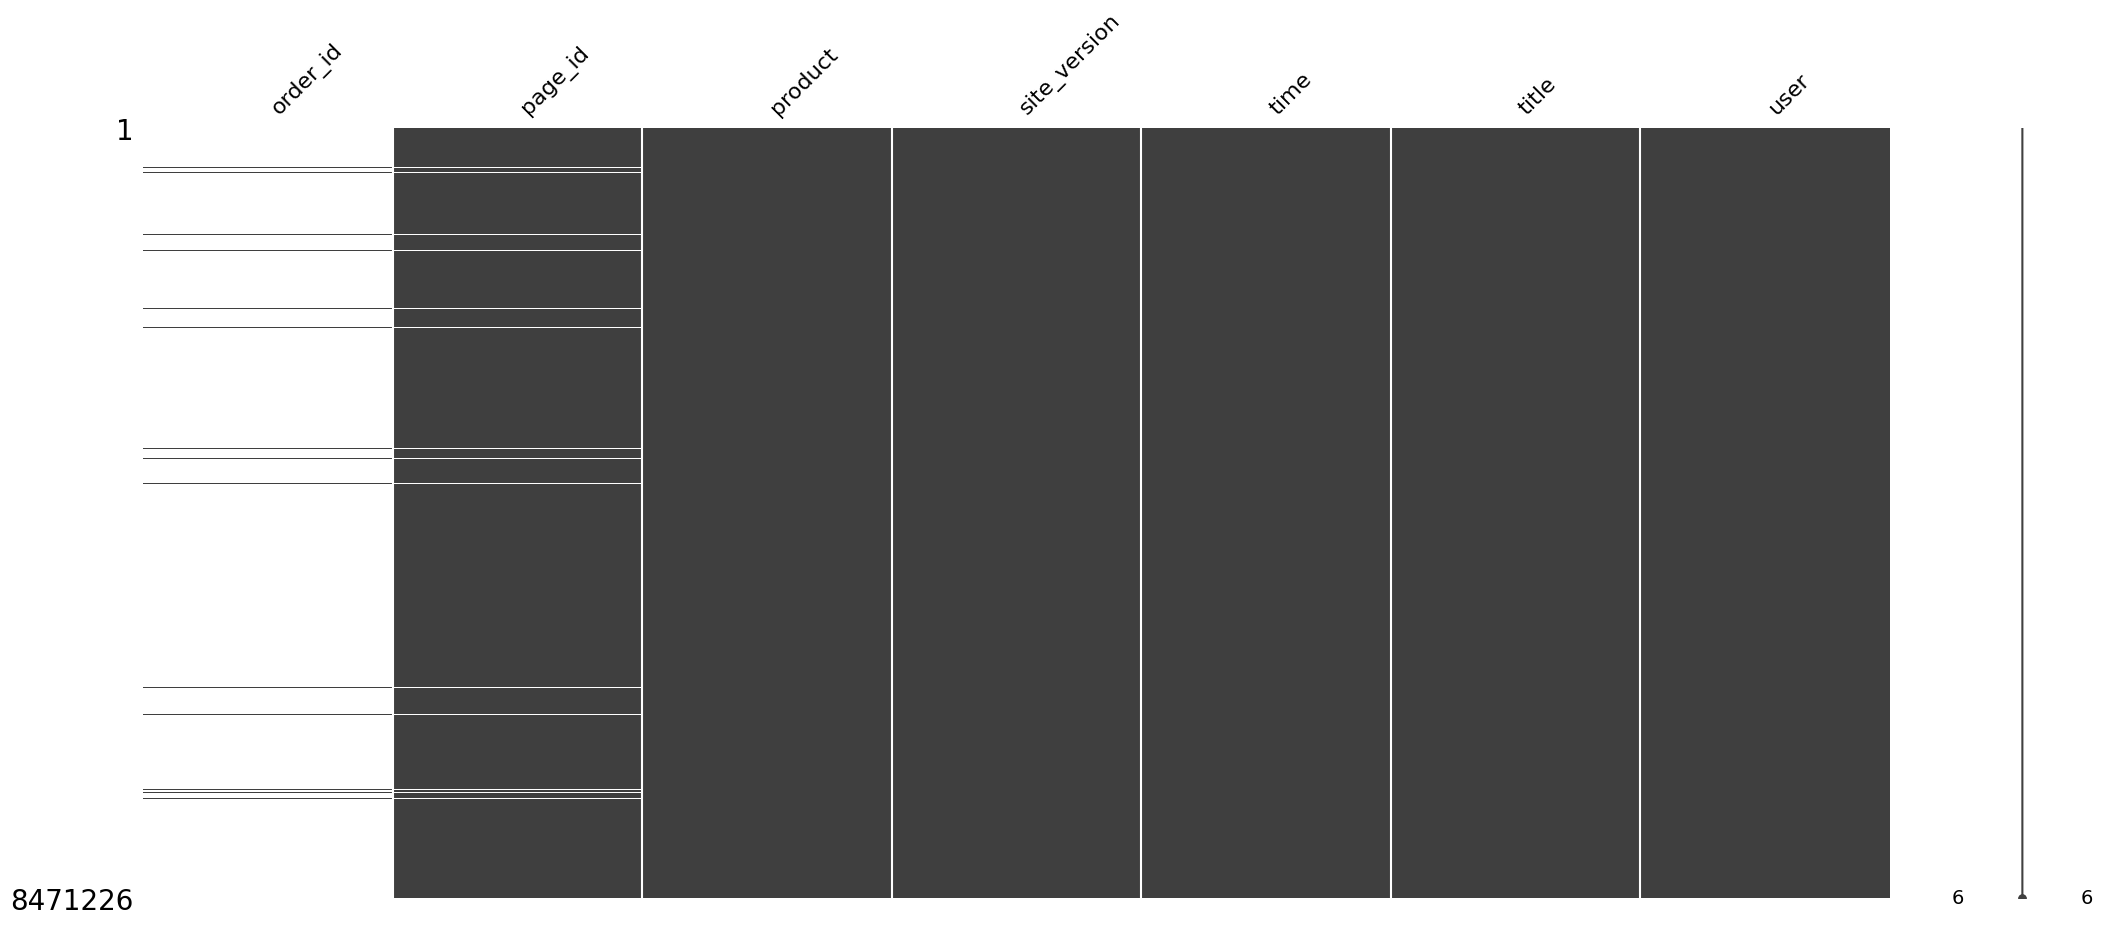

In [7]:
# Визуализация пропусков
print("\nВизуализация пропущенных данных:")
msno.bar(df, labels=True)
msno.matrix(df)

##Пропуски можно заметить только в 2 столбцах(order_id и page_id), это связано с механикой работы сервиса.

In [8]:
# Информация о типах данных
print("\nИнформация о типах данных и пропусках:")
df.info()


Информация о типах данных и пропусках:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471226 entries, 0 to 8471225
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   order_id      float64
 1   page_id       float64
 2   product       object 
 3   site_version  object 
 4   time          object 
 5   title         object 
 6   user          object 
dtypes: float64(2), object(5)
memory usage: 452.4+ MB


Необходимо сменить тип данных в некоторых столбцах:
1) order_id на int
2) page_id на int
3) time на datetime

In [9]:
df['order_id'] = df['order_id'].astype('Int64')
df['page_id'] = df['page_id'].astype('Int64')
df['time'] = pd.to_datetime(df['time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471226 entries, 0 to 8471225
Data columns (total 7 columns):
 #   Column        Dtype         
---  ------        -----         
 0   order_id      Int64         
 1   page_id       Int64         
 2   product       object        
 3   site_version  object        
 4   time          datetime64[ns]
 5   title         object        
 6   user          object        
dtypes: Int64(2), datetime64[ns](1), object(4)
memory usage: 468.6+ MB


In [10]:
df[df['order_id'].notna()]

,order_id,page_id,product,site_version,time,title,user
66,504623,<NA>,sports_nutrition,desktop,2017-03-03 10:15:41,order,user_21
112,463510,<NA>,sneakers,desktop,2017-02-08 21:16:48,order,user_35
113,506727,<NA>,clothes,desktop,2017-02-10 19:12:07,order,user_35
171,95866,<NA>,sports_nutrition,mobile,2017-02-06 10:32:36,order,user_53
185,575369,<NA>,accessories,mobile,2017-02-10 19:18:02,order,user_55
...,...,...,...,...,...,...,...
8471069,435338,<NA>,clothes,desktop,2017-05-29 03:53:48,order,user_4254504
8471071,321005,<NA>,clothes,desktop,2017-05-14 22:33:58,order,user_4254505
8471095,242152,<NA>,accessories,desktop,2017-05-10 17:22:11,order,user_4254523
8471128,770048,<NA>,clothes,mobile,2017-05-11 23:48:35,order,user_4254547


In [11]:
 # Описание числовых столбцов
print("\nСтатистическое описание числовых столбцов:")
print(df.describe())


Статистическое описание числовых столбцов:
            order_id         page_id                           time
count       248722.0       8222504.0                        8471226
mean   419014.864881  12663960.48179  2017-03-24 09:10:40.759827200
min              1.0             3.0            2017-01-01 00:00:03
25%         249551.5      6379248.75  2017-02-15 12:19:33.249999872
50%         411646.0      12790752.0     2017-03-29 15:16:17.500000
75%         580734.5      18961971.0            2017-05-01 07:23:00
max         855750.0      24897219.0            2017-05-31 23:59:58
std    223871.847719  7243112.282671                            NaN


##NA для покупок, кликов и показов баннера можно заменить нулями, для удобства дальнейшей обработки данных.

##Данные содержат информацию об активности за период с 2017-01-01 00:00:03 по 2017-05-31 23:59:58, т.е. за январь - май 2017 года.


In [12]:
# Анализ пропущенных значений по столбцам
missing_percent = df.isnull().mean() * 100
print("\nПроцент пропущенных значений по каждому столбцу:")
print(missing_percent[missing_percent > 0].sort_values(ascending=False))


Процент пропущенных значений по каждому столбцу:
order_id    97.06392
page_id      2.93608
dtype: float64


In [13]:
list(df['product'].unique())

['company', 'sneakers', 'sports_nutrition', 'accessories', 'clothes']

##Столбец product (продукт баннера/покупки) содержит необходимые категории, лишние данные и пропуски отсутствуют.

In [14]:
df.groupby('product')['user'].count()

,user
product,
accessories,1621759
clothes,1786438
company,1725059
sneakers,1703345
sports_nutrition,1634625


## Больше всего активности пользователей за период по категории clothes (одежда), меньше всего по категории accessories (аксессуары)

In [15]:
list(df['site_version'].unique())

['mobile', 'desktop']

In [16]:
df.groupby('site_version')['user'].count()

,user
site_version,
desktop,2382886
mobile,6088340


##Активности мобильной версии сайта составляют 2/3 от общего числа активностей, т.е. пользователи видят и взаимодействуют с сайтом чаще с телефона.

In [17]:
list(df['title'].unique())

['banner_show', 'banner_click', 'order']

In [18]:
df.groupby('title')['user'].count()

,user
title,
banner_click,829185
banner_show,7393319
order,248722


In [19]:
pivot_df = df.pivot_table(index=['site_version','title'],
                    values='user',
                    columns='product',
                    aggfunc='count'
              )

In [20]:
pivot_df

product                    accessories    clothes    company   sneakers  \
site_version title                                                        
desktop      banner_click      18531.0    32781.0    28464.0    21419.0   
             banner_show      410003.0   418070.0   477374.0   411598.0   
             order             22121.0    66977.0        NaN    32565.0   
mobile       banner_click     117723.0   187814.0   116357.0   161178.0   
             banner_show     1030951.0  1035058.0  1102864.0  1041431.0   
             order             22430.0    45738.0        NaN    35154.0   

product                    sports_nutrition  
site_version title                           
desktop      banner_click           13870.0  
             banner_show           417595.0  
             order                  11518.0  
mobile       banner_click          131048.0  
             banner_show          1048375.0  
             order                  12219.0

In [21]:
total_users = pivot_df.sum().sum()
percent_df = pivot_df / total_users * 100
percent_df = percent_df.round(2)

In [22]:
percent_df

product                    accessories  clothes  company  sneakers  \
site_version title                                                   
desktop      banner_click         0.22     0.39     0.34      0.25   
             banner_show          4.84     4.94     5.64      4.86   
             order                0.26     0.79      NaN      0.38   
mobile       banner_click         1.39     2.22     1.37      1.90   
             banner_show         12.17    12.22    13.02     12.29   
             order                0.26     0.54      NaN      0.41   

product                    sports_nutrition  
site_version title                           
desktop      banner_click              0.16  
             banner_show               4.93  
             order                     0.14  
mobile       banner_click              1.55  
             banner_show              12.38  
             order                     0.14

#Сводная таблица показывает, что показов больше всего у баннера рекламы компании в мобильной версии сайта, при этом отсутствуют покупки в этой категории как в мобильной, так и в десктопной версии, т.е. конверсия в покупку нулевая.

Для принятия решения рассчитаем следующие метрики:

- CTR для каждого продукта на баннере (количество кликов / количество показов).
- CR - конверсия в покупки (сколько пользователей, кликнувших по баннеру, совершили покупку).
- Доход от покупок пользователей, пришедших с баннера.

In [23]:
#создадим отдельные датасеты
banner_shows = df[df['title'] == 'banner_show'] #показы баннеров
banner_clicks = df[df['title'] == 'banner_click'] #клики по баннерам

In [24]:
#подсчет количества показов для каждого продукта:
shows_per_product = banner_shows.groupby('product').size().reset_index(name='shows')

In [25]:
#подсчет количества кликов для каждого продукта:
clicks_per_product = banner_clicks.groupby('product').size().reset_index(name='clicks')

In [26]:
shows_per_product

,product,shows
0,accessories,1440954
1,clothes,1453128
2,company,1580238
3,sneakers,1453029
4,sports_nutrition,1465970


In [27]:
clicks_per_product

,product,clicks
0,accessories,136254
1,clothes,220595
2,company,144821
3,sneakers,182597
4,sports_nutrition,144918


In [28]:
banner_stats = pd.merge(shows_per_product, clicks_per_product, on='product', how='left')

In [29]:
banner_stats

,product,shows,clicks
0,accessories,1440954,136254
1,clothes,1453128,220595
2,company,1580238,144821
3,sneakers,1453029,182597
4,sports_nutrition,1465970,144918


###1.Рассчет CTR (Click-Through Rate):
CTR=(Количество показов/ Количество кликов)*100

In [30]:
banner_stats['CTR (%)'] = round((banner_stats['clicks'] / banner_stats['shows']) * 100, 2)

In [31]:
banner_stats

,product,shows,clicks,CTR (%)
0,accessories,1440954,136254,9.46
1,clothes,1453128,220595,15.18
2,company,1580238,144821,9.16
3,sneakers,1453029,182597,12.57
4,sports_nutrition,1465970,144918,9.89


###Баннеры категорий clothes(одежда) и sneakers(кеды)наиболее привлекательны для пользователей, их СTR составляет 15,8% и 12,6% соответственно.

###2.Рассчет CR (Conversion Rate):
CR=(Количество покупок/ Количество кликов)*100

In [32]:
purchases = df[df['title'] == 'order']

In [33]:
purchases

,order_id,page_id,product,site_version,time,title,user
66,504623,<NA>,sports_nutrition,desktop,2017-03-03 10:15:41,order,user_21
112,463510,<NA>,sneakers,desktop,2017-02-08 21:16:48,order,user_35
113,506727,<NA>,clothes,desktop,2017-02-10 19:12:07,order,user_35
171,95866,<NA>,sports_nutrition,mobile,2017-02-06 10:32:36,order,user_53
185,575369,<NA>,accessories,mobile,2017-02-10 19:18:02,order,user_55
...,...,...,...,...,...,...,...
8471069,435338,<NA>,clothes,desktop,2017-05-29 03:53:48,order,user_4254504
8471071,321005,<NA>,clothes,desktop,2017-05-14 22:33:58,order,user_4254505
8471095,242152,<NA>,accessories,desktop,2017-05-10 17:22:11,order,user_4254523
8471128,770048,<NA>,clothes,mobile,2017-05-11 23:48:35,order,user_4254547


In [34]:
#подсчитаем количество покупок для каждого продукта
purchases_per_product = purchases.groupby('product').size().reset_index(name='order')

In [35]:
purchases_per_product

,product,order
0,accessories,44551
1,clothes,112715
2,sneakers,67719
3,sports_nutrition,23737


In [36]:
banner_stats = pd.merge(banner_stats, purchases_per_product, on='product', how='left')

In [37]:
banner_stats

,product,shows,clicks,CTR (%),order
0,accessories,1440954,136254,9.46,44551.0
1,clothes,1453128,220595,15.18,112715.0
2,company,1580238,144821,9.16,NaN
3,sneakers,1453029,182597,12.57,67719.0
4,sports_nutrition,1465970,144918,9.89,23737.0


In [38]:
banner_stats['order'].fillna(0, inplace=True)

<ipython-input-38-806fb73a72d9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  banner_stats['order'].fillna(0, inplace=True)


In [39]:
banner_stats

,product,shows,clicks,CTR (%),order
0,accessories,1440954,136254,9.46,44551.0
1,clothes,1453128,220595,15.18,112715.0
2,company,1580238,144821,9.16,0.0
3,sneakers,1453029,182597,12.57,67719.0
4,sports_nutrition,1465970,144918,9.89,23737.0


In [40]:
banner_stats['CR (%)'] = round((banner_stats['order'] / banner_stats['clicks']) * 100, 2)

In [41]:
banner_stats['order'] = banner_stats['order'].astype('Int64')

In [42]:
banner_stats

,product,shows,clicks,CTR (%),order,CR (%)
0,accessories,1440954,136254,9.46,44551,32.70
1,clothes,1453128,220595,15.18,112715,51.10
2,company,1580238,144821,9.16,0,0.00
3,sneakers,1453029,182597,12.57,67719,37.09
4,sports_nutrition,1465970,144918,9.89,23737,16.38


###Уже на этом этапе можно предложить заменить рекламу компании, в связи с ее низким %CTR, а также 0 заказов. Но допустим:


###3. Доход от покупок пользователей, пришедших с баннера.

Доход=Количество покупок*Средняя цена

Чтобы оценить доход, нужно знать среднюю стоимость покупок. Предположим, что данные о доходах отсутствуют, но я запросил дополнительную информацию о средней стоимости товаров в отделе продаж. Например:

- Средняя цена company — 100 долларов
- Средняя цена sneakers — 80 долларов
- Средняя цена clothes — 60 долларов
- Средняя цена accessories — 40 долларов
- Средняя цена sports_nutrition — 30 долларов


In [43]:
product_prices = {
    'company': 100,
    'sneakers': 80,
    'clothes': 60,
    'accessories': 40,
    'sports_nutrition': 30,
}
banner_stats['average_price'] = banner_stats['product'].map(product_prices)

In [44]:
banner_stats['revenue'] = banner_stats['order'] * banner_stats['average_price']

In [45]:
banner_stats

,product,shows,clicks,CTR (%),order,CR (%),average_price,revenue
0,accessories,1440954,136254,9.46,44551,32.70,40,1782040
1,clothes,1453128,220595,15.18,112715,51.10,60,6762900
2,company,1580238,144821,9.16,0,0.00,100,0
3,sneakers,1453029,182597,12.57,67719,37.09,80,5417520
4,sports_nutrition,1465970,144918,9.89,23737,16.38,30,712110


Также предположим, что я запросил данные у отдела маркетинга и рекламы. Теперь можно смоделировать доход от CPC-рекламы.

Предположим, что за каждый клик платят 1$.

Доход от CPC=Количество кликов*Стоимость за клик


In [46]:
cpc_rate = 1  # Стоимость за клик (CPC)
banner_stats['cpc_revenue'] = banner_stats['clicks'] * cpc_rate

Теперь сравним доходы от собственных баннеров с возможным доходом от CPC-рекламы.

In [47]:
banner_stats

,product,shows,clicks,CTR (%),order,CR (%),average_price,revenue,cpc_revenue
0,accessories,1440954,136254,9.46,44551,32.70,40,1782040,136254
1,clothes,1453128,220595,15.18,112715,51.10,60,6762900,220595
2,company,1580238,144821,9.16,0,0.00,100,0,144821
3,sneakers,1453029,182597,12.57,67719,37.09,80,5417520,182597
4,sports_nutrition,1465970,144918,9.89,23737,16.38,30,712110,144918


#Итоговый вывод

##Доход от CPC больше дохода от продаж только у company, также у этой рекламы самый низкий %CTR, и 0 заказов, рекомендую рассмотреть предложение о продаже этого места под рекламу.

В ходе исследования выяснилось, что:
  1. Данные содержат информацию об активности за период с января по май 2017г. При необходимости и потребности у руководства можно изучить тренды и сезонность активности у пользователей, что даст возможность своевременно вносить корректировки в рекламную кампанию.
  2. Активности мобильной версии сайта составляют 2/3 от общего числа активностей, т.е. пользователи видят и взаимодействуют с сайтом чаще с телефона. Возможно, стоит проверить гипотизу о том, что стоит запускать различную рекламу на мобильной версии сайта и на десктопной.
  3. Лучшими рекламными кампаниями можно назвать clothes(одежда)  и sneakers (кеды), у них самые высокие %% CTR и CR.
